Protein Domain Analysis

Constructed the counts by running [countProteinDomainsPerExperiment](https://github.com/Wellstein-lab/singleCellLongReadAnalysis/blob/main/CountProteinDomainsPerExperiment.md) as described

The output from the [make_protein_counts_matrix.py](https://github.com/Wellstein-lab/singleCellLongReadAnalysis/blob/main/bin/make_protein_counts_matrix.py) is then input into this notebook to make a heatma.

In [1]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager", repos = "https://cloud.r-project.org")


In [2]:
BiocManager::install("dplyr")
BiocManager::install("Glimma")
BiocManager::install("edgeR")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'dplyr'”
Old packages: 'evaluate', 'lifecycle', 'scales'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'Glimma'”
Old packages: 'evaluate', 'lifecycle', 'scales'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", pac

In [3]:
library(Glimma)
library(dplyr)
library(edgeR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: limma



In [4]:
getwd()

[1] "/Users/annedeslattesmays/Desktop/projects/singleCellLongReadAnalysis/ipynb"

In [5]:
setwd("../data/protein_matrices/")


In [6]:
getwd()


[1] "/Users/annedeslattesmays/Desktop/projects/singleCellLongReadAnalysis/data/protein_matrices"

In [7]:
cts <- as.matrix(read.csv("SRSF5_protein_domain_counts.csv",sep=","))

In [8]:
dim(cts)

[1]  7 46

In [9]:
cts[1:4,1:5]

Protein,Domain_Name,AA_position,Domain_Sequence,Alin_neg_clust0
SRSF5,RRM_1,4-74,CRVFIGRLNPAAREKDVERFFKGYGRIRDIDLKRGFGFVEFEDPRDADDAVYELDGKELCSERVTIEHARA,0
SRSF5,Basic_and_acidic_residues,73-104,RARSRGGRGRGRYSDRFSSRRPRNDRRNAPPV,0
SRSF5,Disordered,73-105,RARSRGGRGRGRYSDRFSSRRPRNDRRNAPPVR,0
SRSF5,RRM_2,108-181,NRLIVENLSSRVSWQDLKDFMRQAGEVTFADAHRPKLNEGVVEFASYGDLKNAIEKLSGKEINGRKIKLIEGSK,0


In [10]:
featureData <- cts[,1:4]

In [11]:
cts <- cts[,5:dim(cts)[2]]

In [12]:
head(featureData,2)

Protein,Domain_Name,AA_position,Domain_Sequence
SRSF5,RRM_1,4-74,CRVFIGRLNPAAREKDVERFFKGYGRIRDIDLKRGFGFVEFEDPRDADDAVYELDGKELCSERVTIEHARA
SRSF5,Basic_and_acidic_residues,73-104,RARSRGGRGRGRYSDRFSSRRPRNDRRNAPPV


In [13]:
sample_names <- c("ALN_0","ALN_1","ALN_2","ALN_3","ALN_4","ALN_5","ALN_6","ALN_7","ALN_8","ALN_9",
                  "BMB_0","BMAB_0","BMB_1","BMAB_1","BMB_2","BMAB_2","BMB_3","BMAB_3",
                  "BMB_4","BMAB_4","BMB_5","BMB_6",
                  "BMB_7","BMAB_7","BMB_8","BMAB_8","BMB_9","BMAB_9",
                  "BLN_0","BLN_1","BLN_2","BLN_3","BLN_4","BLN_5","BLN_6","BLN_7","BLN_8","BLN_9",
                  "bulk_BM_1b","bulk_BM_2",
                  "bulk_LN_7_1","bulk_LN_7_2")
cluster_group <- c("0","1", "2","3","4","5","6","7","8","9",
                   "0","0","1","1","2","2","3","3",
                   "4","4","5","6",
                   "7","7","8","8","9","9",
                   "0","1","2","3","4","5","6","7","8","9",
                   "all","all","all","all")


In [14]:
dim(cts)
colnames(cts) <- (sample_names)
cts[,36:42]

[1]  7 42

BLN_7,BLN_8,BLN_9,bulk_BM_1b,bulk_BM_2,bulk_LN_7_1,bulk_LN_7_2
0,0,0,0,0,0,0
0,0,0,10,11,9,10
0,0,0,10,11,9,10
0,0,0,4,6,5,6
0,0,0,11,13,10,13
0,0,0,11,13,10,13
0,0,0,11,13,10,13


In [15]:
cts_nobulk <- data.frame(cts[,1:38])
cts_nobulk[,1:7]

ALN_0,ALN_1,ALN_2,ALN_3,ALN_4,ALN_5,ALN_6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,0,0,0,0,0,0
0,0,1,0,1,0,0
0,0,1,0,1,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


In [16]:
is.numeric(cts_nobulk)

[1] FALSE

In [17]:
cts_nobulk <- data.matrix(cts_nobulk)
cts_nobulk[,1:7]
is.numeric(cts_nobulk)

ALN_0,ALN_1,ALN_2,ALN_3,ALN_4,ALN_5,ALN_6
1,1,1,1,1,1,1
1,1,2,1,2,1,1
1,1,2,1,2,1,1
1,1,1,1,1,1,1
1,1,1,1,1,1,1
1,1,1,1,1,1,1
1,1,1,1,1,1,1


[1] TRUE

In [18]:
# lets look at limma/voom
BiocManager::install("limma")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'limma'”
Old packages: 'evaluate', 'lifecycle', 'scales'



In [19]:
BiocManager::install("statmod")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'statmod'”
Old packages: 'evaluate', 'lifecycle', 'scales'



In [20]:
library(limma)
library(edgeR)
library(statmod)

In [21]:
# making a counts matrix
dge <- DGEList(counts=cts_nobulk)

In [22]:
colnames(dge)

[1] "ALN_0"  "ALN_1"  "ALN_2"  "ALN_3"  "ALN_4"  "ALN_5"  "ALN_6"  "ALN_7" 
 [9] "ALN_8"  "ALN_9"  "BMB_0"  "BMAB_0" "BMB_1"  "BMAB_1" "BMB_2"  "BMAB_2"
[17] "BMB_3"  "BMAB_3" "BMB_4"  "BMAB_4" "BMB_5"  "BMB_6"  "BMB_7"  "BMAB_7"
[25] "BMB_8"  "BMAB_8" "BMB_9"  "BMAB_9" "BLN_0"  "BLN_1"  "BLN_2"  "BLN_3" 
[33] "BLN_4"  "BLN_5"  "BLN_6"  "BLN_7"  "BLN_8"  "BLN_9"

In [23]:
head(dge,2)

An object of class "DGEList"
$counts
  ALN_0 ALN_1 ALN_2 ALN_3 ALN_4 ALN_5 ALN_6 ALN_7 ALN_8 ALN_9 BMB_0 BMAB_0
1     1     1     1     1     1     1     1     1     1     1     1      1
2     1     1     2     1     2     1     1     1     1     1     1      1
  BMB_1 BMAB_1 BMB_2 BMAB_2 BMB_3 BMAB_3 BMB_4 BMAB_4 BMB_5 BMB_6 BMB_7 BMAB_7
1     1      1     1      1     1      1     1      1     1     1     1      1
2     1      1     2      2     1      1     1      1     1     1     1      1
  BMB_8 BMAB_8 BMB_9 BMAB_9 BLN_0 BLN_1 BLN_2 BLN_3 BLN_4 BLN_5 BLN_6 BLN_7
1     1      1     1      1     1     1     1     1     1     1     1     1
2     1      1     1      1     1     2     1     2     1     2     1     1
  BLN_8 BLN_9
1     1     1
2     1     1

$samples
      group lib.size norm.factors
ALN_0     1        7            1
ALN_1     1        7            1
ALN_2     1        9            1
ALN_3     1        7            1
ALN_4     1        9            1
33 more rows ...

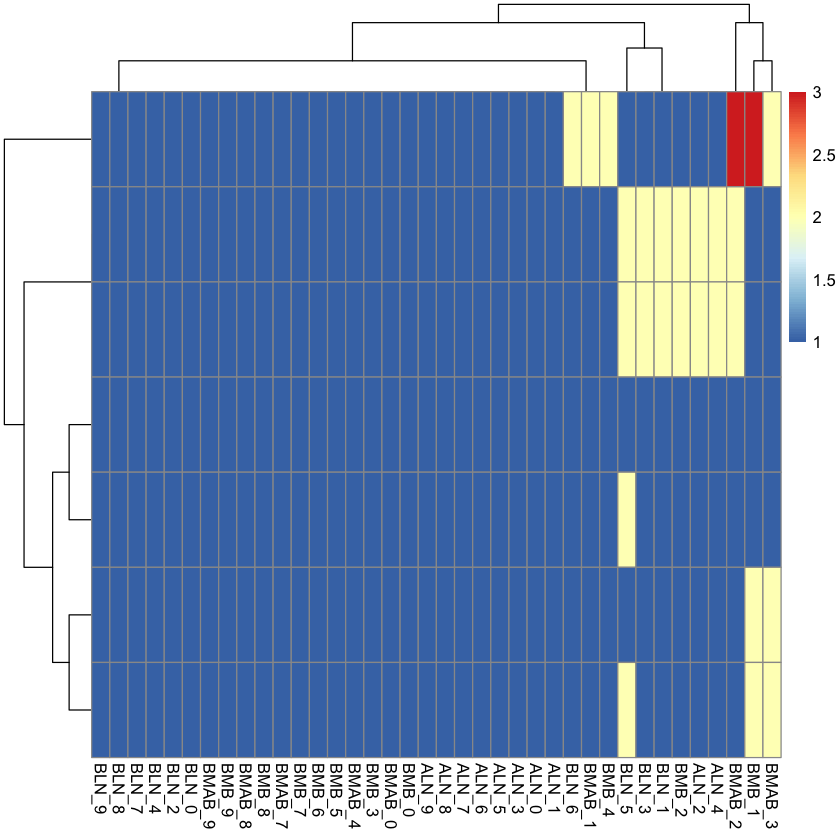

In [30]:
library("pheatmap")
#df <- as.data.frame(coldata[,c("condition","patient")])
out <- pheatmap(cts_nobulk)

In [24]:
design <- model.matrix(~ 0 + factor(c(rep("LN",9),rep("BM",16),rep("LN",9))))


In [26]:
colnames(design)<- c("BM","LN")
design

,BM,LN
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1
10,1,0


In [28]:
# normalize and filter
keep          <-filterByExpr(dge, design)

In [29]:
is.logical(keep)

[1] TRUE

In [30]:
dge          <- dge         [keep,,keep.lib.size=FALSE]

In [39]:
# apply scale normalization
dge          <- calcNormFactors(dge)
dge

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


An object of class "DGEList"
$counts
     ALN_0 ALN_1 ALN_2 ALN_3 ALN_4 ALN_5 ALN_6 ALN_7 ALN_8 ALN_9 BMB_0 BMAB_0
     BMB_1 BMAB_1 BMB_2 BMAB_2 BMB_3 BMAB_3 BMB_4 BMAB_4 BMB_5 BMB_6 BMB_7
     BMAB_7 BMB_8 BMAB_8 BMB_9 BMAB_9 BLN_0 BLN_1 BLN_2 BLN_3 BLN_4 BLN_5 BLN_6
     BLN_7 BLN_8 BLN_9

$samples
      group lib.size norm.factors
ALN_0     1        0            1
ALN_1     1        0            1
ALN_2     1        0            1
ALN_3     1        0            1
ALN_4     1        0            1
33 more rows ...

In [38]:
# MDS Plot - can we separate the samples well?
logCPM <- cpm(dge, log=TRUE, prior.count=3)
#plotMDS(logCPM,labels=colnames(cts_nobulk))
logCPM

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


ALN_0,ALN_1,ALN_2,ALN_3,ALN_4,ALN_5,ALN_6,ALN_7,ALN_8,ALN_9,⋯,BLN_0,BLN_1,BLN_2,BLN_3,BLN_4,BLN_5,BLN_6,BLN_7,BLN_8,BLN_9


In [37]:
fit <- lmFit(logCPM, design)
fit <- eBayes(fit, trend=TRUE)
de_results <- topTable(fit, coef=ncol(design), n=Inf) 
lookup <- rownames(de_results)
length(featureData[lookup,2])
head(featureData[lookup,2])

ERROR: Error in lmFit(logCPM, design): expression matrix has zero rows


In [ ]:
# Assuming you have the 'de_results' object from topTable
fold_change_threshold <- 8
adjusted_pvalue_threshold <- 0.05

# Select genes that meet both fold change and adjusted p-value criteria
significant_filtered_genes <- filtered_de_results[
  abs(filtered_de_results$logFC) > fold_change_threshold &
  filtered_de_results$adj.P.Val < adjusted_pvalue_threshold,
]
dim(significant_filtered_genes)

In [ ]:
filtered_lookup <- rownames(significant_filtered_genes)
significant_filtered_expression <- filtered_dge[filtered_lookup,]

In [ ]:
significant_filtered_out <- pheatmap(significant_filtered_expression, 
                            cluster_rows5=TRUE, 
                            show_rownames=FALSE,
                            cluster_cols=TRUE, 
                            annotation_col=df, 
                            scale="row",
                            clustering_method = "ward.D2",
                            clustering_distance_cols = "minkowski", 
                            clustering_distance_rows = "minkowski" )


In [ ]:
# weighting 
v <- voom(filtered_dge, plot=TRUE, normalize="quantile")

In [ ]:
vwts <- voomWithQualityWeights(filtered_dge, design=design, normalize.method="quantile", plot=TRUE)

In [ ]:
vwtsfit <- lmFit(vwts, design, weights = vwts$weights )
# no other weighting at this time.
 #* c(1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0))


In [ ]:
summary(vwtsfit)

In [ ]:
vwtsfit <- eBayes (vwtsfit)
vwtsfit <- treat(vwtsfit, lfc=log2(1.2))
topTreat(vwtsfit, coef=ncol(design),sort.by="logFC")

In [ ]:
de_vwts_results <- topTreat(vwtsfit, coef=ncol(design), n=Inf, sort.by="logFC")

In [ ]:
sum(de_vwts_results[,"logFC"] >= 1.5)
sum(de_vwts_results[,"logFC"] >= 2.0)
sum(de_vwts_results[,"logFC"] >= 4.0)
sum(de_vwts_results[,"logFC"] >= 8.0)
sum(de_vwts_results[,"logFC"] >= 9.0)

In [ ]:
# Assuming you have the 'de_results' object from topTable
fold_change_threshold <- 9
adjusted_pvalue_threshold <- 0.05

# Select genes that meet both fold change and adjusted p-value criteria
significant_genes <- de_vwts_results[
  abs(de_vwts_results$logFC) > fold_change_threshold &
  de_vwts_results$adj.P.Val < adjusted_pvalue_threshold,
]


In [ ]:
dim(significant_genes)

In [ ]:
transformed_expression <- vwts$E

In [ ]:
dim(transformed_expression)

In [ ]:
significant_transformed_expression <- transformed_expression[rownames(significant_genes),]
dim(significant_transformed_expression)

In [ ]:
featureData[head(rownames(significant_transformed_expression),5),2]

In [ ]:
string_gene_list <- as.matrix(featureData[rownames(significant_genes),2])
length(string_gene_list)
#string_gene_list

In [ ]:
top_significant_genes <- dge[rownames(significant_genes),]

In [ ]:
dim(top_significant_genes)

In [ ]:
head(top_significant_genes,5)
featureData[rownames(head(top_significant_genes,5)),2]

In [ ]:
head(vwts,5)

In [ ]:
library("pheatmap")
df <- as.data.frame(coldata[,c("condition","patient")])

In [ ]:
out<-pheatmap(significant_transformed_expression, cluster_rows5=TRUE, show_rownames=FALSE,
         cluster_cols=TRUE, annotation_col=df, scale="row",clustering_distance_cols = "minkowski", clustering_distance_rows = "minkowski" )

In [ ]:
head(top_genes_expression[out$tree_row$order,],3)

In [ ]:
top_genes_expression[out$tree_row$order[1:10],]

In [ ]:
start=1
stop=441
date="2023Aug28"
piece <-top_genes_expression[out$tree_row$order[start:stop],]
fd <- data.frame(featureData[rownames(piece),])
genejunction <- paste(featureData[rownames(piece),2],rownames(piece),sep=".")
rownames(fd) <- genejunction
rownames(piece) <- genejunction
outpiece<-pheatmap(piece, cluster_rows5=TRUE, show_rownames=TRUE,
         cluster_cols=TRUE, annotation_col=df, scale="row",clustering_distance_cols = "minkowski", clustering_distance_rows = "minkowski" )
piece_filename <- paste(paste(paste(paste(date,"string_SE_gene_junction",sep="_"),start,sep="_"),stop,sep="_"),"csv",sep=".")
piece_exp <- piece[,c(1,3,5,7,2,4,6,8)]
colnames(piece_exp) <- colnames(piece[,c(1,3,5,7,2,4,6,8)])
rownames(piece_exp) <- rownames(piece)
string_filename <- paste(paste(paste(paste(date,"string_SE_gene",sep="_"),start,sep="_"),stop,sep="_"),"csv",sep=".")
piece_exp_filename <- paste(paste(paste(paste(date,"SE_expression",sep="_"),start,sep="_"),stop,sep="_"),"csv",sep=".")
write.csv(piece_exp$counts,piece_exp_filename,quote=FALSE)
write.csv(rownames(piece),piece_filename,quote=FALSE,row.names=FALSE)
write.csv(fd[,2],string_filename,quote=FALSE,row.names=FALSE)

In [ ]:
summary(out)

In [ ]:
length(featureData[out$tree_row$order,2])

In [ ]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
save_pheatmap_pdf(out, "top_genes_expression.pdf")

In [ ]:
#Re-order original data (genes) to match ordering in heatmap (top-to-bottom)
rn <- rownames(top_genes_expression[out$tree_row[["order"]],])
cn <- colnames(top_genes_expression[,out$tree_col[["order"]]])

In [ ]:
#If you want something like gene-to-cluster assignment, you can 'cut' your row dendrogram into a pre-selected number of groups as follows:
#8 groups
clusters<- as.matrix(row_clusters<- sort(cutree(out$tree_row, k=6)),nrows=dim(top_genes_expression)[1],ncols=1)
genes_in_clusters = featureData[rownames(clusters),2]
genes_in_clusters.df <- data.frame(featureData[rownames(clusters),2], clusters)
colnames(genes_in_clusters.df) <- c("geneSymbol","cluster")
dim(genes_in_clusters.df)
cluster_1_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 1,]
cluster_2_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 2,]
cluster_3_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 3,]
cluster_4_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 4,]
cluster_5_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 5,]
cluster_6_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 6,]
#cluster_7_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 7,]
write.csv(cluster_1_genes$geneSymbol,"string_list_cluster_1.csv",quote=FALSE,row.names=FALSE)
write.csv(cluster_2_genes$geneSymbol,"string_list_cluster_2.csv",quote=FALSE,row.names=FALSE)
write.csv(cluster_3_genes$geneSymbol,"string_list_cluster_3.csv",quote=FALSE,row.names=FALSE)
write.csv(cluster_4_genes$geneSymbol,"string_list_cluster_4.csv",quote=FALSE,row.names=FALSE)
write.csv(cluster_5_genes$geneSymbol,"string_list_cluster_5.csv",quote=FALSE,row.names=FALSE)
write.csv(cluster_6_genes$geneSymbol,"string_list_cluster_6.csv",quote=FALSE,row.names=FALSE)
#write.csv(cluster_7_genes$geneSymbol,"string_list_cluster_7.csv",quote=FALSE,row.names=FALSE)


In [ ]:
#to understand the difference between AML and TAM, we will use contrasts

In [ ]:
fit2 <- eBayes(fit2)

In [ ]:
topTable(fit2, adjust="BH")

In [ ]:
de_results_fit2 <- topTable(fit2, adjust="BH", n=Inf)
dim(de_results_fit2)

In [ ]:
results2 <- decideTests(fit2)

To permit the comparison and analysis of the group as distinguished by difference between the two conditions, TAM and AML, categorically, that is a means method.
We do this using contrasts.

In [ ]:
contrasts_fit_venn_counts <- vennCounts(results2)

In [ ]:
contrasts_fit_venn_counts

In [ ]:
head(results2)

In [ ]:
head(de_results2)

In [ ]:
filtered_de_results2 <- de_results2[c((abs(de_results2[,c("AMLvsTAM")]) > 1.5) |
                        (abs(de_results2[,c("TAMvsAML")]) > 1.5)),]

In [ ]:
filtered_de_results2